In [1]:
import pandas as pd
import numpy as np
from plotterUtils import *
import matplotlib.pyplot as ply

In [2]:
df = pd.read_pickle("new_withCNN.pkl")

In [3]:
df.head()

,event,run,lumi,ak7pfcand_ijet,ak7pfcand_eta,ak7pfcand_phi,ak7pfcand_pt,ak7pfcand_charge,ak7pfcand_id,met,...,neutHad_filter,jet_electron_frac_ak7,jet_muon_frac_ak7,jet_charHad_frac_ak7,jet_neutHad_frac_ak7,jet_photon_mult_ak7,jet_electron_mult_ak7,jet_muon_mult_ak7,jet_charHad_mult_ak7,jet_neutHad_mult_ak7
0,2828,1,12,0,"[-1.00876903534, -1.00456035137, -1.0215094089...","[-0.202069446445, -0.180981457233, -0.18487790...","[215.670425415, 69.4226837158, 37.9222221375, ...","[0, -1, 0, 1, -1, -1, 1, -1, 0, 0, 0, 0, 0, -1...","[130, 211, 22, 211, 211, 211, 211, 211, 22, 22...",0.000000,...,"[False, True, False, True, True, True, True, T...",0.000000,0.0,0.438379,0.361819,23,0,0,1,20
1,2828,1,12,1,"[1.66161680222, 1.66750192642, 1.68926799297, ...","[-2.74814629555, -2.76039361954, -2.7736279964...","[69.3041152954, 63.403377533, 27.3246078491, 2...","[-1, 1, -1, 1, 0, 1, 1, -1, -1, -1, -1, 1, -1,...","[211, 211, 211, 211, 22, 211, 211, 211, 211, 2...",0.000000,...,"[True, True, True, True, False, True, True, Tr...",0.000000,0.0,0.013427,0.884433,5,0,0,3,23
2,2828,1,12,2,"[0.528619468212, 0.530503809452, 0.50972801446...","[2.67870116234, 2.38817501068, 2.41568040848, ...","[33.1523323059, 31.7618350983, 16.7182769775, ...","[-1, 0, 1, 1, -1, 0, 0, 1, 0, -1, 1, -1, 1, -1...","[211, 22, 211, 211, 211, 22, 22, 211, 130, 211...",0.000000,...,"[True, False, True, True, True, False, False, ...",0.014132,0.0,0.078258,0.571310,17,1,0,7,23
3,2828,1,12,3,"[-0.301580011845, -0.340516895056, -0.52871024...","[2.22358512878, 2.25516295433, 2.2361035347, 2...","[60.3280105591, 20.7011852264, 13.2065992355, ...","[0, 1, 0, -1, -1, 1, 0, -1, 0, 0, 0, 0, -1, 0,...","[22, 211, 22, 211, 211, 211, 22, 211, 22, 22, ...",0.000000,...,"[False, True, False, True, True, True, False, ...",0.000000,0.0,0.011919,0.294783,14,0,0,2,8
4,2829,1,12,0,"[0.167199209332, 0.202694311738, 0.16929551959...","[1.42906928062, 1.42884945869, 1.41367650032, ...","[148.439788818, 24.7823085785, 22.5962409973, ...","[0, -1, 1, 0, 1, 0, 1, 1, 1, -1, 0, 0, -1, -1,...","[22, 211, 211, 22, 211, 130, 211, 211, 211, 21...",15.200917,...,"[False, True, True, False, True, False, True, ...",0.000000,0.0,0.062894,0.396774,18,0,0,4,21


In [4]:
# plot_var='residual'
# plotMean(df,'residual','jet_pt_ak7',10,100,1000)
# plt.show()
# plotMean(df,'residual','jet_eta_ak7',20,-2.5,2.5)
# plt.ylim(-0.01,0.01)
# plt.show()
# plotMean(df,'residual','jet_electron_frac_ak7',20,0.,1.)
# plt.show()
# plotMean(df,plot_var,'jet_muon_frac_ak7',20,0.,1.)
# plt.show()
# plotMean(df,plot_var,'jet_photon_frac_ak7',20,0.,1.)
# plt.show()
# plotMean(df,plot_var,'jet_neuHad_frac_ak7',20,0.,1.)
# plt.show()
# plotMean(df,plot_var,'jet_charHad_frac_ak7',20,0.,1.)
# plt.show()
# plotMean(df,plot_var,'jet_electron_mult_ak7',5,-0.1,5.1)
# plt.show()
# plotMean(df,plot_var,'jet_muon_mult_ak7',5,-0.1,5.1)
# plt.show()
# plotMean(df,plot_var,'jet_photon_mult_ak7',20,0.,80.)
# plt.show()
# plotMean(df,plot_var,'jet_neuHad_mult_ak7',10,0.,20.)
# plt.show()
# plotMean(df,plot_var,'jet_charHad_mult_ak7',20,0.,120.)
# plt.show()

In [39]:
def residual_profile(plot_var,low_bin,high_bin,nbins):
    print "plot_var:",plot_var
    print "low_bin:",low_bin
    print "high_bin:",high_bin
    print "nbins:",nbins
    df[plot_var+'_bins'] = pd.cut(df[plot_var],np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins)),labels=range(nbins))
    means = df.groupby([plot_var+'_bins']).mean()['residual'].values
    counts = df.groupby([plot_var+'_bins']).count()['residual'].values
    sqrt_counts = map(sqrt,counts)
    errs  = df.groupby([plot_var+'_bins']).std()['residual'].values
    errs = errs/sqrt_counts
    bin_center=np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins))
    bin_center = bin_center[:-1]
    bin_center = map(lambda x : x+(high_bin-low_bin)/float(nbins)/2.,bin_center)
    plt.errorbar(x=bin_center,y=means,yerr=errs,fmt='o',color='m')
    plt.ylim(-0.02,0.02)
    plt.show()

plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 9


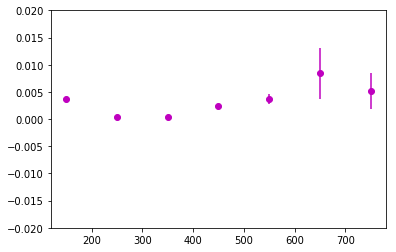

plot_var: jet_eta_ak7
low_bin: -2
high_bin: 2
nbins: 20


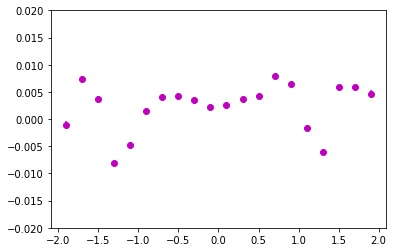

plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 20


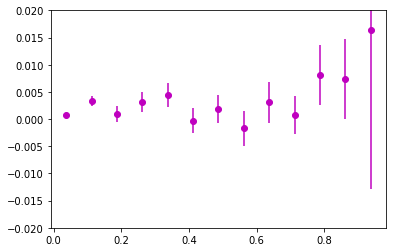

plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 20


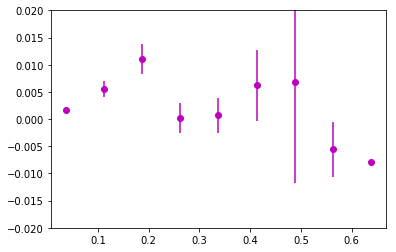

plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 20


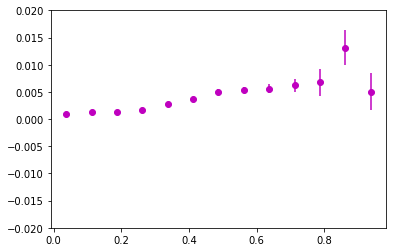

plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 20


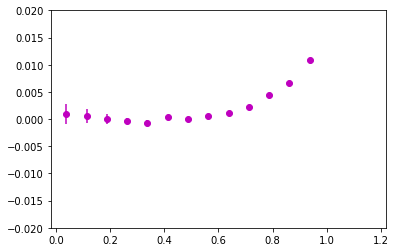

plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 20


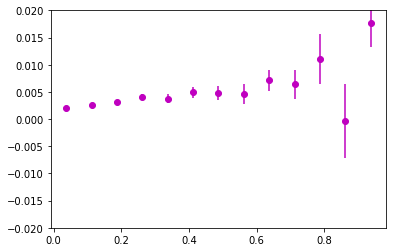

plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 10
nbins: 10


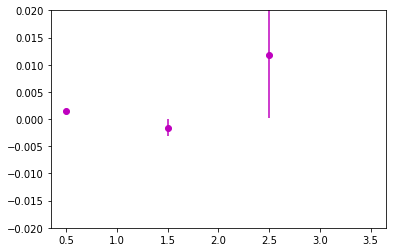

plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 10
nbins: 10


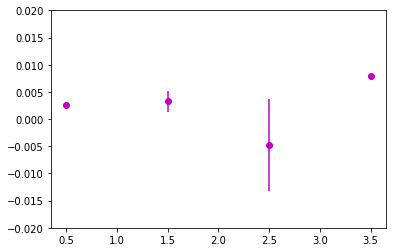

plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 30
nbins: 30


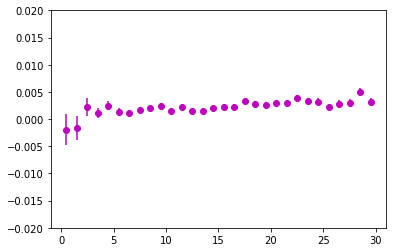

plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 30
nbins: 30


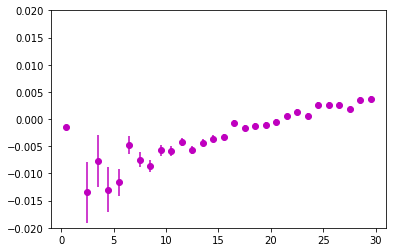

plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 30
nbins: 30


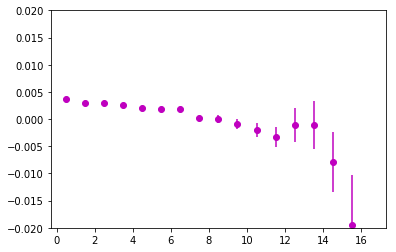

In [41]:
plot_vars=['jet_pt_ak7','jet_eta_ak7','jet_electron_frac_ak7','jet_muon_frac_ak7','jet_photon_frac_ak7','jet_neutHad_frac_ak7','jet_charHad_frac_ak7','jet_electron_mult_ak7','jet_muon_mult_ak7','jet_photon_mult_ak7','jet_neutHad_mult_ak7','jet_charHad_mult_ak7']
var_binning = [(100,1000,9),(-2,2,20),(0,1.5,20),(0,1.5,20),(0,1.5,20),(0,1.5,20),(0,1.5,20),(0,10,10),(0,10,10),(0,30,30),(0,30,30),(0,30,30)]
for v,b in zip(plot_vars,var_binning) :
    residual_profile(v,*b)